# PNEUMONIA DETECTION USING CONVOLUTIONAL NEURAL NETWORKS(CNN)

In [1]:
# Importing LIBRARIES
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


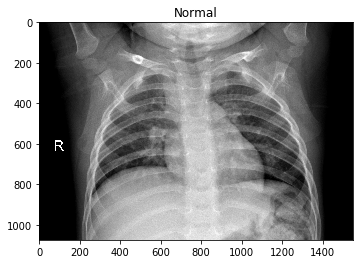

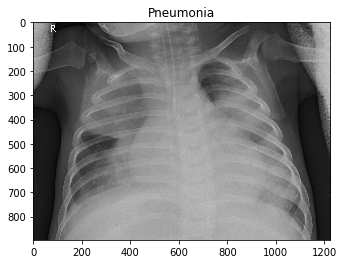

In [2]:
# Displaying images of Normal and Pneumonia
img_n = load_img('C:/Users/hi/Desktop/sb/pro/pne/chest_xray/train/NORMAL/IM-0234-0001.jpeg')
plt.imshow(img_n)
plt.title("Normal")
plt.show()

img_p = load_img('C:/Users/hi/Desktop/sb/pro/pne/chest_xray/train/PNEUMONIA/person7_bacteria_24.jpeg')
plt.imshow(img_p)
plt.title("Pneumonia")
plt.show()

In [10]:
# Specifying the path of the data(train,test,validaton)

train = 'C:/Users/hi/Desktop/sb/pro/pne/chest_xray/train'
test = 'C:/Users/hi/Desktop/sb/pro/pne/chest_xray/test'
val = 'C:/Users/hi/Desktop/sb/pro/pne/chest_xray/val'



In [11]:

img_width,img_height= 150,150
if K.image_data_format() == 'channels_first':
    input_shape = (3,img_width,img_height)
else:
     input_shape = (img_width,img_height,3)


# Creating Model

In [12]:
#It’s just a thing function that you use to get the output of node. It is also known as Transfer Function.


model = Sequential()
# The number of filters are 32 and the kernal_size is (3,3)
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(50))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(50))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
#Here we use RMSPROP optimizer and BINARY_CROSSENTROPY as loss function  
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [15]:
#ImageDataGenerator-Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [16]:
# Here we import images directly from Directory by using flow_from_directory method.
#flow_from_directory() automatically infers the labels from the directory structure of the folders containing images
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [17]:
train_samples = 5217
validation_samples = 17
epochs = 20
batch_size = 16


In [18]:
#We Fit the model here using fit_generator as we are dealing with large datasets.
model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
326/326 [==============================] - 251s 771ms/step - loss: 0.4586 - acc: 0.8069 - val_loss: 0.5251 - val_acc: 0.6875
Epoch 2/20
326/326 [==============================] - 216s 661ms/step - loss: 0.2658 - acc: 0.8995 - val_loss: 0.5447 - val_acc: 0.6875
Epoch 3/20
326/326 [==============================] - 211s 648ms/step - loss: 0.2036 - acc: 0.9252 - val_loss: 0.5080 - val_acc: 0.8125
Epoch 4/20
326/326 [==============================] - 214s 656ms/step - loss: 0.1876 - acc: 0.9312 - val_loss: 0.5804 - val_acc: 0.6875
Epoch 5/20
326/326 [==============================] - 220s 674ms/step - loss: 0.1827 - acc: 0.9312 - val_loss: 0.6717 - val_acc: 0.6875
Epoch 6/20
326/326 [==============================] - 215s 660ms/step - loss: 0.1670 - acc: 0.9385 - val_loss: 0.8058 - val_acc: 0.6250
Epoch 7/20
326/326 [==============================] - 215s 661ms/step - loss: 0.1641 - acc: 0.9406 - val_loss: 0.8793 - val_acc: 0.6875


In [19]:
#Accuracy of test data.
test_acc = model.evaluate_generator(test_generator,624/16)
print("\n Accuracy: %.2f%%" % ( test_acc[1]*100))


acc: 90.87%


In [20]:
# saving model in H5 format.
model.save('vison_v1.0.h5')

In [21]:
# saving model in Json format.
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)